In [1]:
import sys
import os
if os.pardir not in sys.path:
    sys.path.append(os.pardir)

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from basic.imdb_data import read_imdb_data
import common.util as util

Using TensorFlow backend.


In [3]:
imdb_data = read_imdb_data(validation_size=10000)

In [4]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(imdb_data.train.data, imdb_data.train.labels, epochs=20, batch_size=512, 
                    validation_data=(imdb_data.validation.data, imdb_data.validation.labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 515us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

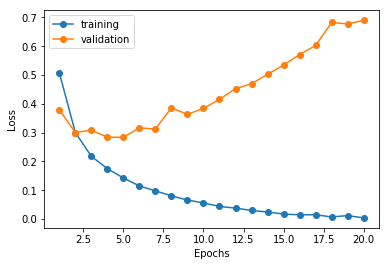

In [6]:
util.plot_history(history.history['loss'], history.history['val_loss'], ylabel='Loss')

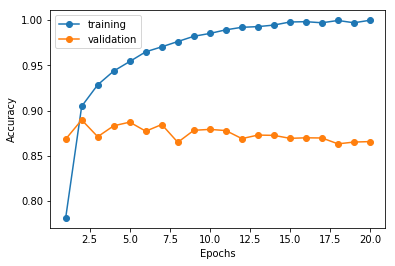

In [7]:
util.plot_history(history.history['acc'], history.history['val_acc'], ylabel='Accuracy')

In [8]:
imdb_data = read_imdb_data(validation_size=0)

In [9]:
model.fit(imdb_data.train.data, imdb_data.train.labels, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.2187 - acc: 0.9451
Epoch 2/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.1395 - acc: 0.9592
Epoch 3/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.1138 - acc: 0.9654
Epoch 4/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.0896 - acc: 0.9729


In [10]:
model.evaluate(imdb_data.test.data, imdb_data.test.labels)

25000/25000 [==============================] - 4s 174us/step


[0.5641033211278915, 0.84784]

In [11]:
model.predict(imdb_data.test.data)

array([[0.00871435],
       [0.99999726],
       [0.123879  ],
       ...,
       [0.0254566 ],
       [0.03872176],
       [0.3925297 ]], dtype=float32)